<a href="https://colab.research.google.com/github/chaitragopalappa/MIE590-690D/blob/main/2b_Code_NN_Backprop_2HLayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural networks with two Hidden Layers


In [ ]:
# @title Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


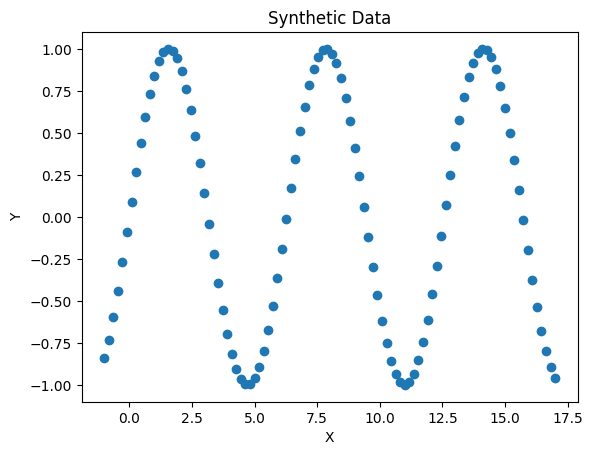

In [ ]:
# @title Generate synthetic data  { vertical-output: true }
X = np.linspace(-1, 17, 100).reshape(-1, 1)
#Y = X ** 2 + np.random.randn(100, 1) * 2
Y = np.sin(X) #+ np.random.randn(100, 1)*0.2
plot = plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Data")
plt.show()

In [ ]:
# @title Set Model architecture  - Hyperparameters (try different values)
#Note: Number of hidden layer fixed at 2
# Hyperparameters
hidden_layer1_size = 28
hidden_layer2_size = 4
learning_rate = 0.001
epochs = 100000

In [ ]:
# @title Initialize network
# Define the neural network architecture
input_size = 1
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_layer1_size)
b1 = np.zeros((1, hidden_layer1_size))

W2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
b2 = np.zeros((1, hidden_layer2_size))

W3 = np.random.randn(hidden_layer2_size, output_size)
b3 = np.zeros((1, output_size))

# Activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


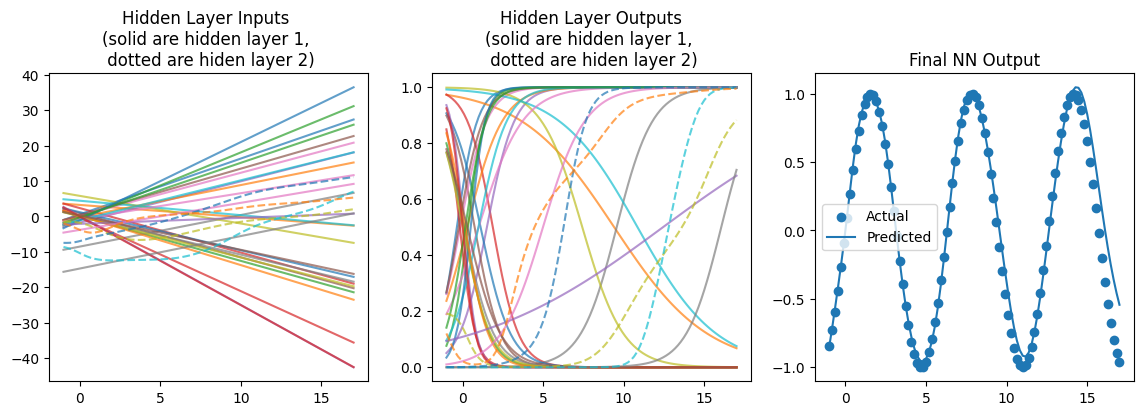

In [ ]:
# @title Backpropagation algorithm with Two Hidden Layers

loss_history = []
predicted_output_history = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, W3) + b3
    output = z3  # linear output for regression

    # Loss (MSE)
    loss = np.mean((Y - output) ** 2)

    # Backpropagation
    d_output = -(Y - output)  # derivative wrt output

    dW3 = np.dot(a2.T, d_output)
    db3 = np.sum(d_output, axis=0, keepdims=True)

    d_a2 = np.dot(d_output, W3.T) * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, d_a2)
    db2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, d_a1)
    db1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update weights
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 100 == 0:
        loss_history.append(loss)
        predicted_output_history.append(output)

# --- Visualization ---
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(14, 4))

# input
#ax1.scatter(X, X, label="Input")
#ax1.set_title("Input signal")
#ax1.legend()

# Hidden layer inputs
for i in range(hidden_layer1_size):
    ax2.plot(X, z1[:, i], label=f"H1 Node {i+1}", alpha=0.7)
for j in range(hidden_layer2_size):
    ax2.plot(X, z2[:, j], "--", label=f"H2 Node {j+1}", alpha=0.7)

ax2.set_title("Hidden Layer Inputs \n(solid are hidden layer 1, \n dotted are hiden layer 2)")
#ax2.legend()

# Hidden layer outputs
for i in range(hidden_layer1_size):
    ax3.plot(X, a1[:, i], label=f"H1 Node {i+1}", alpha=0.7)
for j in range(hidden_layer2_size):
    ax3.plot(X, a2[:, j], "--", label=f"H2 Node {j+1}", alpha=0.7)
ax3.set_title("Hidden Layer Outputs\n(solid are hidden layer 1, \n dotted are hiden layer 2)")

# Actual vs predicted
ax4.scatter(X, Y, label="Actual")
ax4.plot(X, output, label="Predicted")
ax4.set_title("Final NN Output")
ax4.legend()

# Animation of learning
#line_predicted, = ax3.plot(X, predicted_output_history[0], label="Predicted")
#line_actual, = ax3.plot(X, Y, label="Actual")
#ax3.set_title("Training Progress")
#ax3.legend()





In [ ]:
# Save weights and biases
np.savez("nn_weights.npz", W1=W1, b1=b1, W2=W2, b2=b2, W3=W3, b3=b3)
print("Weights and biases saved to nn_weights.npz")

Weights and biases saved to nn_weights.npz


    z1 = np.dot(X, W1) + b1  
    a1 = sigmoid(z1)  

    z2 = np.dot(a1, W2) + b2  
    a2 = sigmoid(z2)  

    z3 = np.dot(a2, W3) + b3  
    output = z3  # linear output for regression  
Loaded W1 shape: (1, 18)  
Loaded b1 shape: (1, 18)  
Loaded W2 shape: (18, 4)  
Loaded b2 shape: (1, 4)  
Loaded W3 shape: (4, 1)  
Loaded b3 shape: (1, 1)  

W1= [[-1.38556801 -0.92335989  0.79788631 -0.88669382 -1.00963791 -0.91303474
  -0.91105803  1.50373982 -1.10929696  1.3112719   1.01658165 -0.96621051
  -1.55186473 -1.17885741  1.92800939  2.80901033 -0.9874747   1.72518121]]

W2= [[ 1.98637856 -2.47337483  0.03569829  0.41359384]
 [-0.32475599 -1.5574703   0.9817562  -0.4818007 ]
 [ 0.89503049  0.30207986 -0.84552012 -0.55012346]
 [-0.7138953  -1.63609911 -0.61656779  0.72344512]
 [ 0.97781646  0.89473524  1.99840707 -0.97118021]
 [-0.33678273  0.90975499 -0.6922131   0.059299  ]
 [-0.71927062 -0.69908954 -0.60576496 -1.7300831 ]
 [-2.19783087 -2.70216486  0.82939069 -2.13791422]
 [ 0.69880564  0.08113068 -0.80032649  0.39737898]
 [-2.47757723 -2.19052641 -2.09990404 -0.14542782]
 [ 0.56270652 -0.16618188  0.83579556 -0.37816081]
 [-0.06502915 -0.83333975 -0.60423105 -2.75205727]
 [ 0.58861459 -5.99571152 -0.62543829  1.81073031]
 [ 1.7786124   0.05763167 -0.81316684 -0.25713432]
 [-0.23241202 -1.78689266  0.5274993   0.6348164 ]
 [ 0.49348775 -1.19706819  0.07783492 -0.19024511]
 [-2.53003468  5.68501844 -0.86907746 -3.61893385]
 [ 1.95948031  3.11056508 -1.57926084  1.96944786]]

W3=[[-3.94250194]
 [-5.72162589]
 [ 1.03660037]
 [-3.2704202 ]]

b1=[[ 2.02038960e+00  8.95603910e-01 -7.54347399e-01  1.05935666e+00
   5.23198314e-01  1.34699323e-01  6.06659258e-01 -1.00382443e+01
   4.23842734e-02 -9.61130572e-02 -3.09394748e-01  6.41484592e-01
   1.27639870e+01  2.72696291e-03  9.53057408e-02  1.40172005e-01
   1.45023143e+01 -4.70713686e+00]]

b2 =[[-0.02191423 -1.09757839 -0.3676921   0.46446954]]

b3=[[1.68821158]]




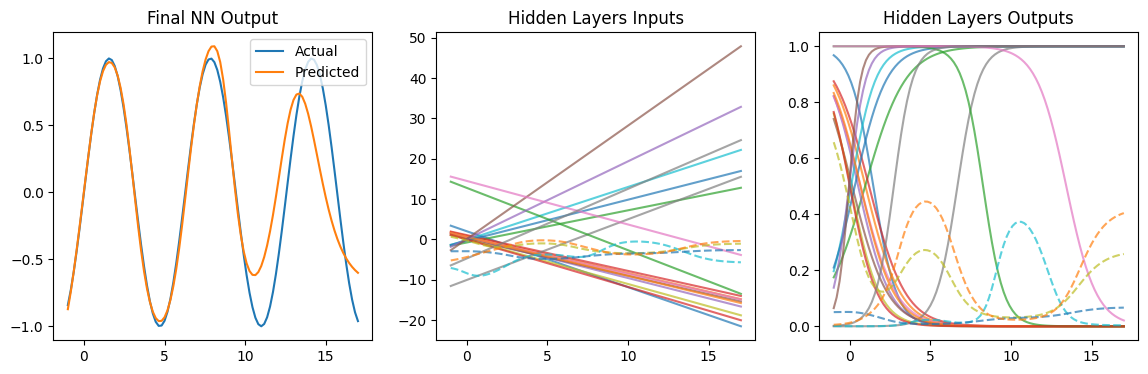